In [138]:
#install Package
library('ggplot2') 
library('caret') 
library('dplyr') 
library('randomForest') 
library('rpart')

#memangil data
data=read.csv('D:/titanic.csv',sep=',')

#menampilkan data
head(data)

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583


In [139]:
#mengidentifikasi tipe data, jumlah kolom, dan nama variabel
length(data)
str(data)
class(data)
names(data)

[1] 8

'data.frame':	887 obs. of  8 variables:
 $ Survived               : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass                 : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name                   : Factor w/ 887 levels "Capt. Edward Gifford Crosby",..: 602 823 172 814 733 464 700 33 842 839 ...
 $ Sex                    : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age                    : num  22 38 26 35 35 27 54 2 27 14 ...
 $ Siblings.Spouses.Aboard: int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parents.Children.Aboard: int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare                   : num  7.25 71.28 7.92 53.1 8.05 ...


[1] "data.frame"

[1] "Survived"                "Pclass"                 
[3] "Name"                    "Sex"                    
[5] "Age"                     "Siblings.Spouses.Aboard"
[7] "Parents.Children.Aboard" "Fare"

Dari hasil diatas kita mengetahui bahwa data yang diolah mengandung data kategorik dan data rasio. Seluruh data memiliki 8 kolom dan membentuk data.frame

In [140]:
# mengubah data menjadi faktor
data$Survived=as.factor(data$Survived)
data$Pclass=as.factor(data$Pclass)
data$Sex=as.factor(data$Sex)
data$Siblings.Spouses.Aboard=as.factor(data$Siblings.Spouses.Aboard)

In [141]:
#mendeteksi missing value
colSums(is.na(data))

Survived                  Pclass                    Name 
                      0                       0                       0 
                    Sex                     Age Siblings.Spouses.Aboard 
                      0                       0                       0 
Parents.Children.Aboard                    Fare 
                      0                       0

Setelah missing value di deteksi, hasilnya tidak terdapat cell kosong untuk seluruh variabel

Dilihat dari kedua pie chart yang dihasilkan
1. mayoritas penumpang atau 61.4% penumpang meninggal
2. Penumpang lebih banyak yang memilih untuk menggunakan kelas 3, diikuti kelas 2, lalu satu
3. Mayoritas penumpang yang menaiki titanic berjenis kelamin laki-laki

Survived,n,persen,label
0,545,0.6144307,61.4%
1,342,0.3855693,38.6%


Sex,n,persen,label
female,314,0.3540023,35.4%
male,573,0.6459977,64.6%


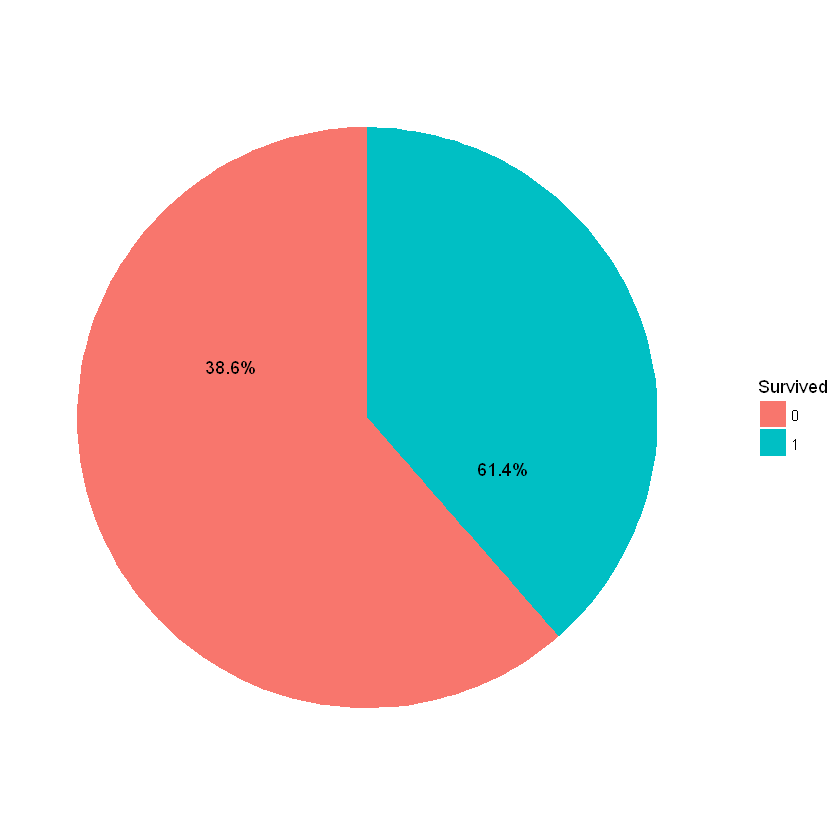

Pclass,n,persen,label
1,216,0.2435175,24.4%
2,184,0.2074408,20.7%
3,487,0.5490417,54.9%


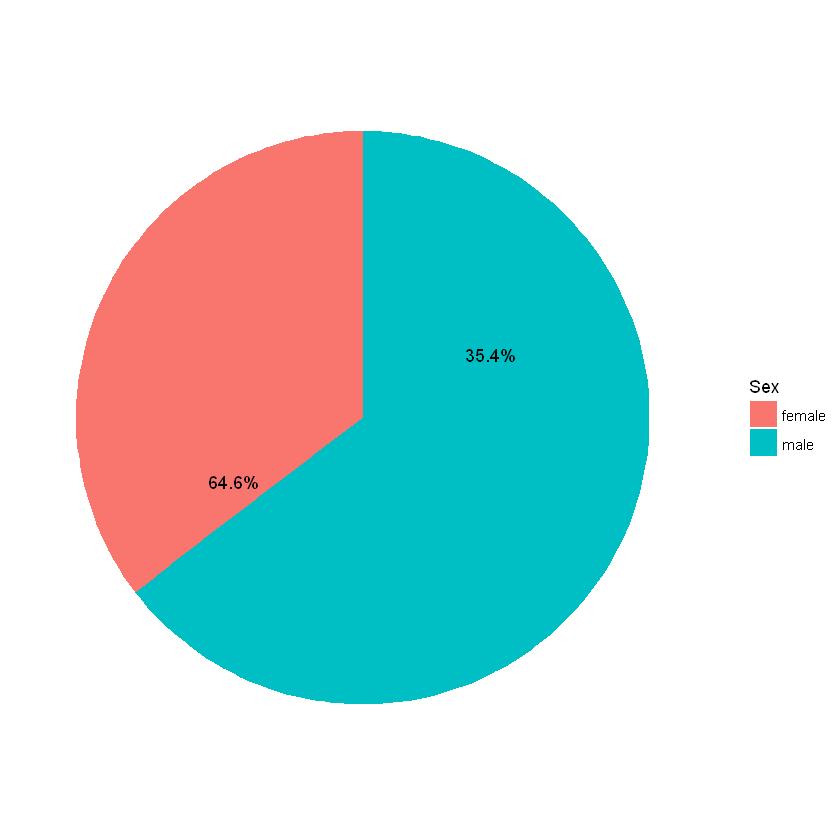

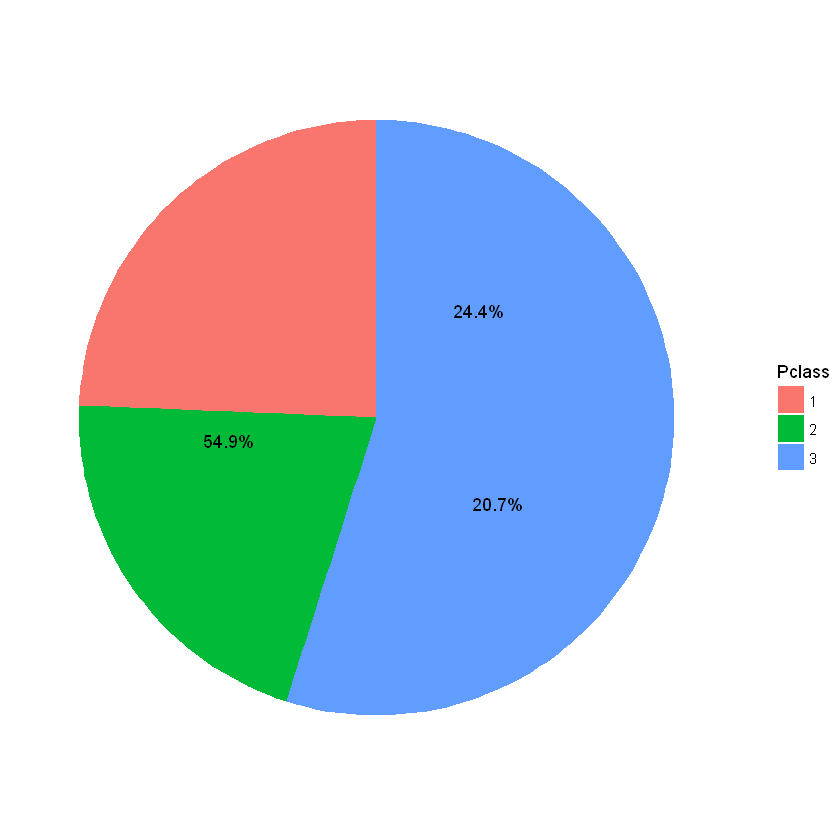

In [158]:
#1. Survived
Survived<- data  %>%
    count(Survived) %>%
    mutate(persen = n/sum(n))
Survived$label <- scales::percent(Survived$persen)
Survived
ggplot(data=Survived)+
  geom_bar(aes(x="", y=persen, fill=Survived), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

#2. Sex
Sex<- data  %>%
    count(Sex) %>%
    mutate(persen = n/sum(n))
Sex$label <- scales::percent(Sex$persen)
Sex
ggplot(data=Sex)+
  geom_bar(aes(x="", y=persen, fill=Sex), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

#3. Pclass
Pclass<- data  %>%
    count(Pclass) %>%
    mutate(persen = n/sum(n))
Pclass$label <- scales::percent(Pclass$persen)
Pclass
ggplot(data=Pclass)+
  geom_bar(aes(x="", y=persen, fill=Pclass), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))



Siblings.Spouses.Aboard,n,persen,label
0,604,0.680947012,68.1%
1,209,0.235625705,23.6%
2,28,0.031567080,3.2%
3,16,0.018038331,1.8%
4,18,0.020293123,2.0%
5,5,0.005636979,0.6%
8,7,0.007891770,0.8%


Parents.Children.Aboard,n,persen,label
0,674,0.759864713,76.0%
1,118,0.133032694,13.3%
2,80,0.090191657,9.0%
3,5,0.005636979,0.6%
4,4,0.004509583,0.5%
5,5,0.005636979,0.6%
6,1,0.001127396,0.1%


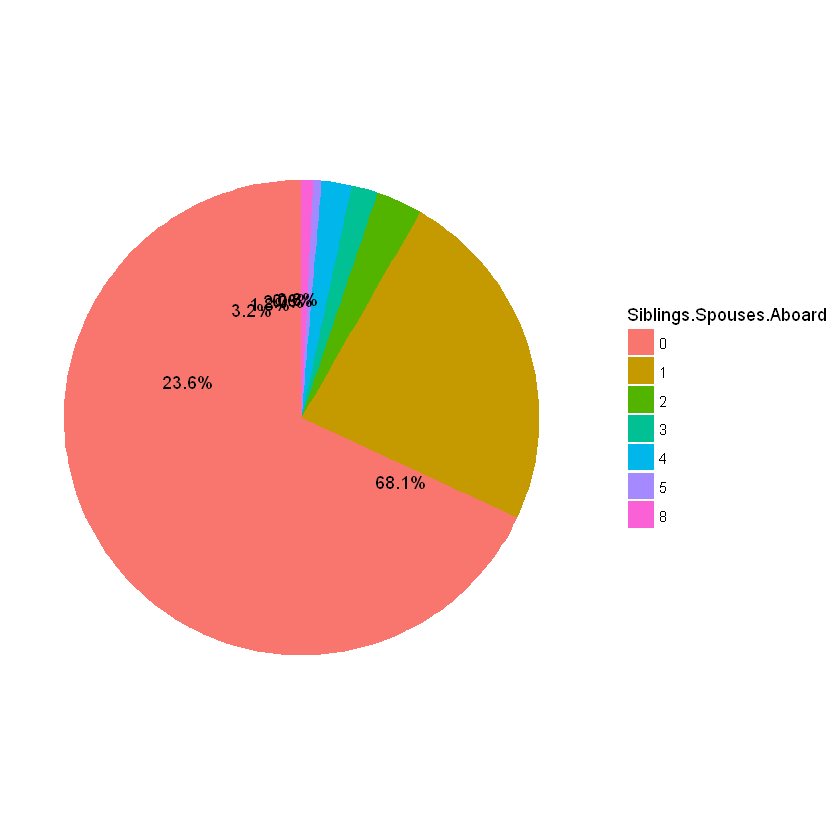

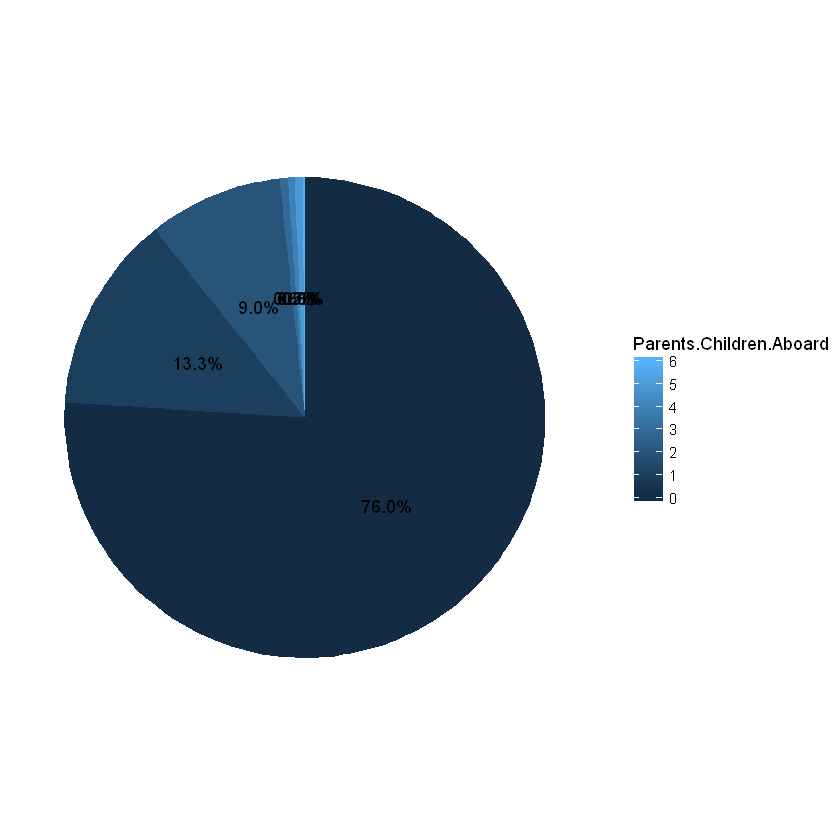

In [143]:
#4. Siblings.Spouses.Aboard
Siblings.Spouses.Aboard<- data  %>%
    count(Siblings.Spouses.Aboard) %>%
    mutate(persen = n/sum(n))
Siblings.Spouses.Aboard$label <- scales::percent(Siblings.Spouses.Aboard$persen)
Siblings.Spouses.Aboard
ggplot(data=Siblings.Spouses.Aboard)+
  geom_bar(aes(x="", y=persen, fill=Siblings.Spouses.Aboard), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

#5. Parents.Children.Aboard
Parents.Children.Aboard<- data  %>%
    count(Parents.Children.Aboard) %>%
    mutate(persen = n/sum(n))
Parents.Children.Aboard$label <- scales::percent(Parents.Children.Aboard$persen)
Parents.Children.Aboard
ggplot(data=Parents.Children.Aboard)+
  geom_bar(aes(x="", y=persen, fill=Parents.Children.Aboard), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))


Disimpulkan bahwa mayoritas penumpang menaiki titanic tanpa membawa keluarga, pasangan, maupun saudara

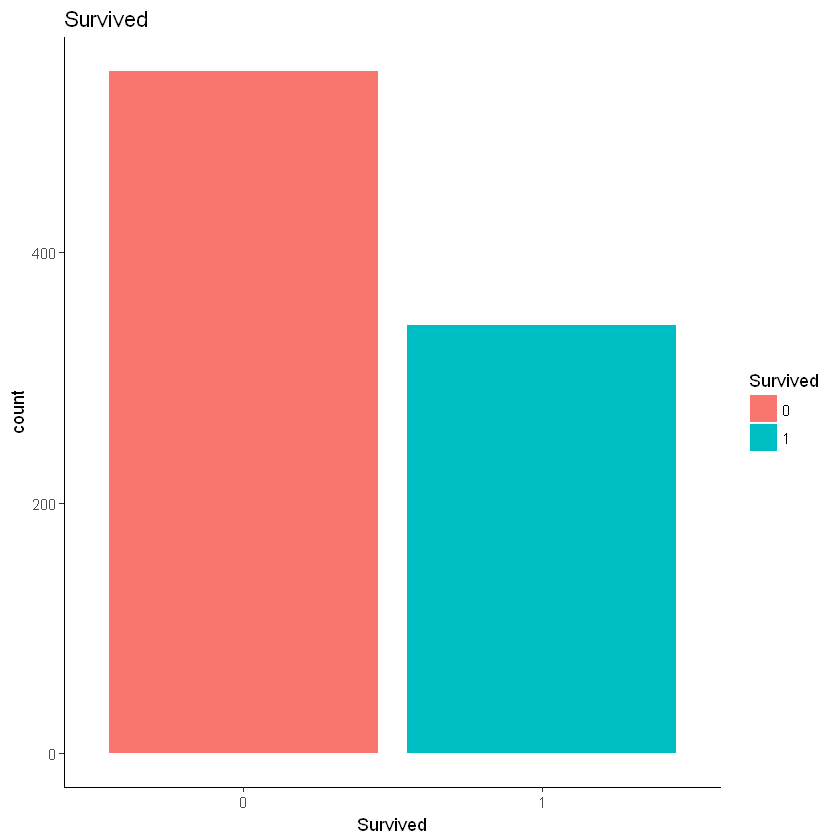

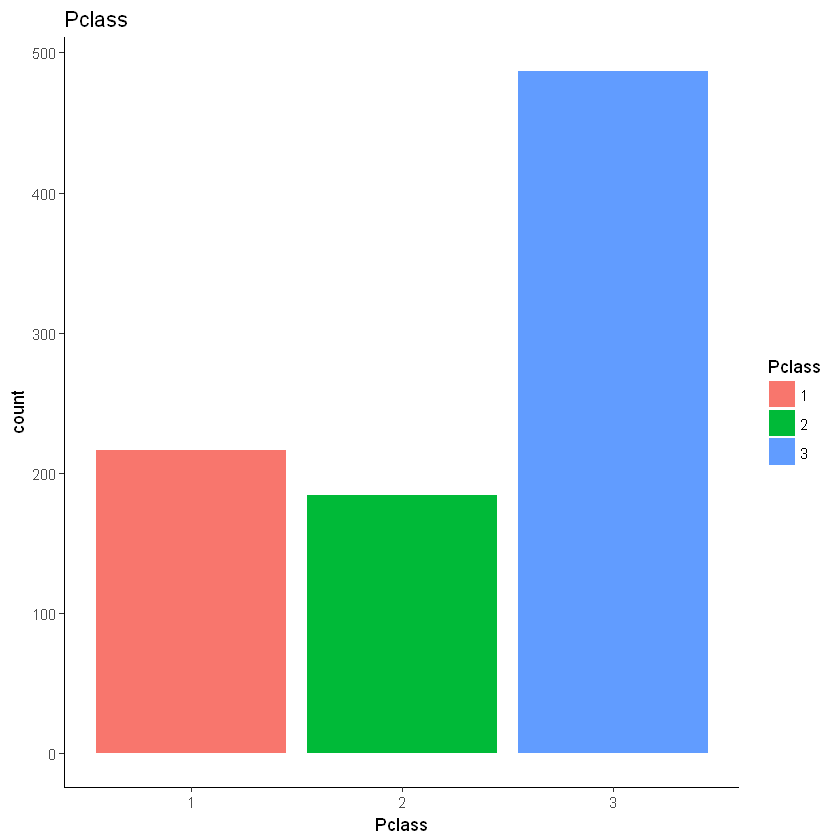

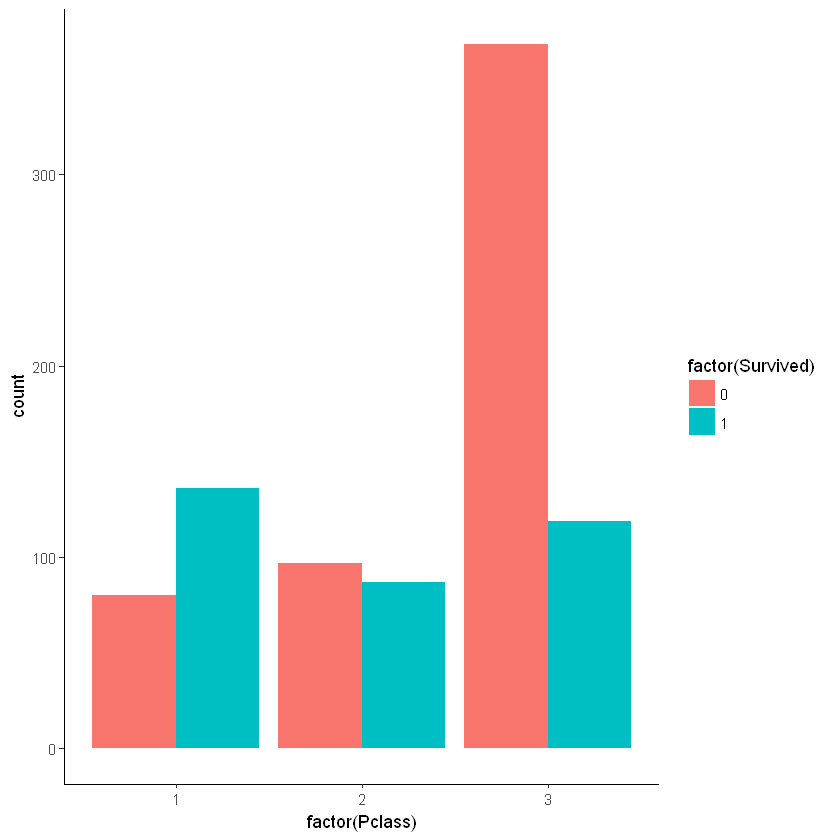

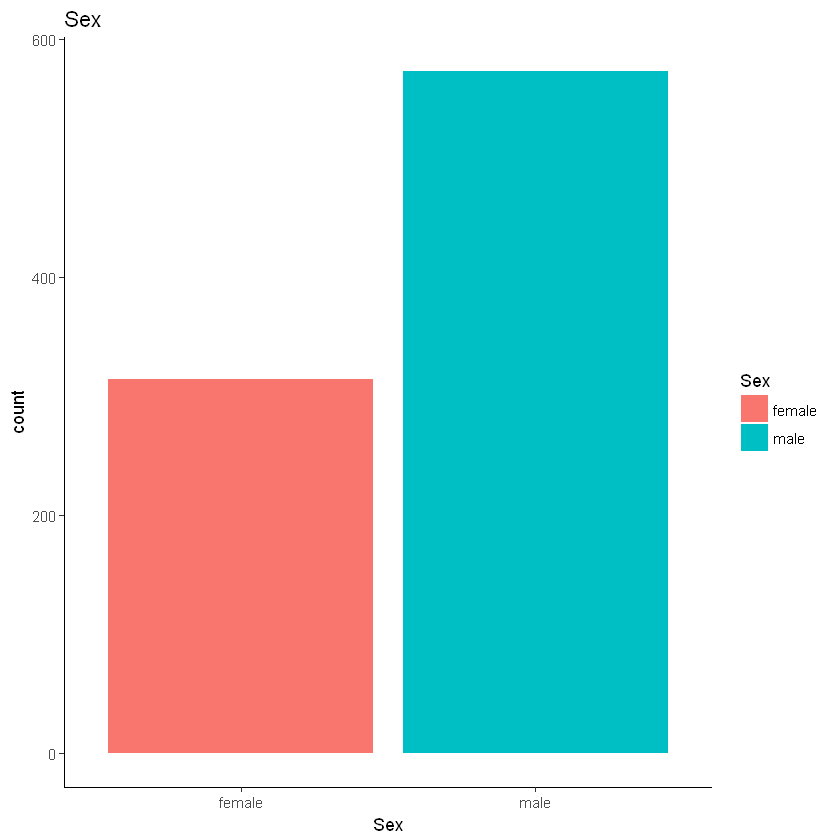

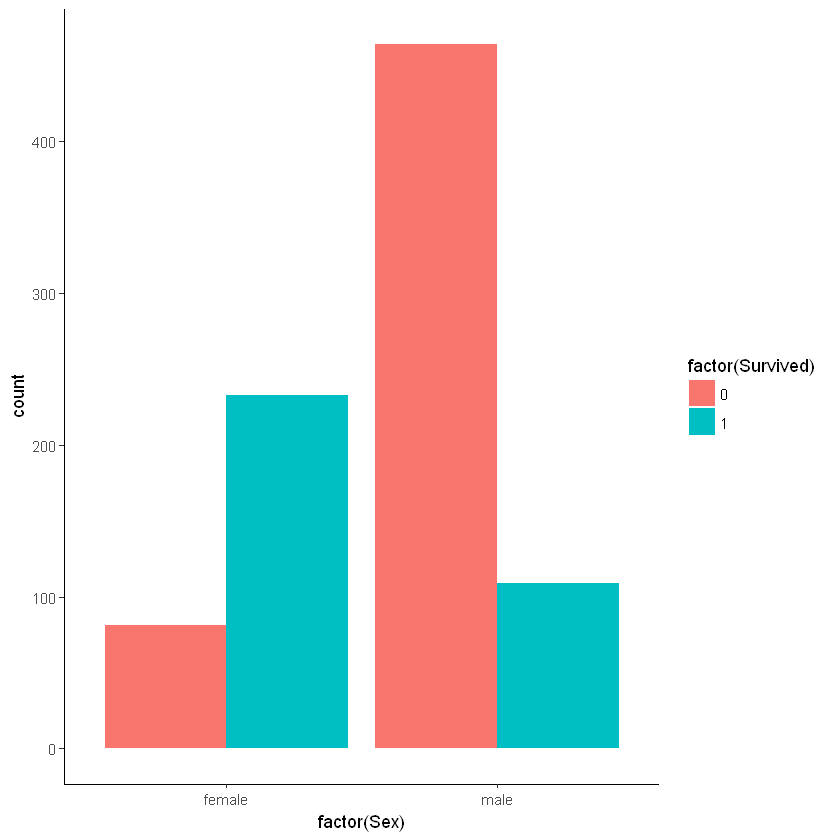

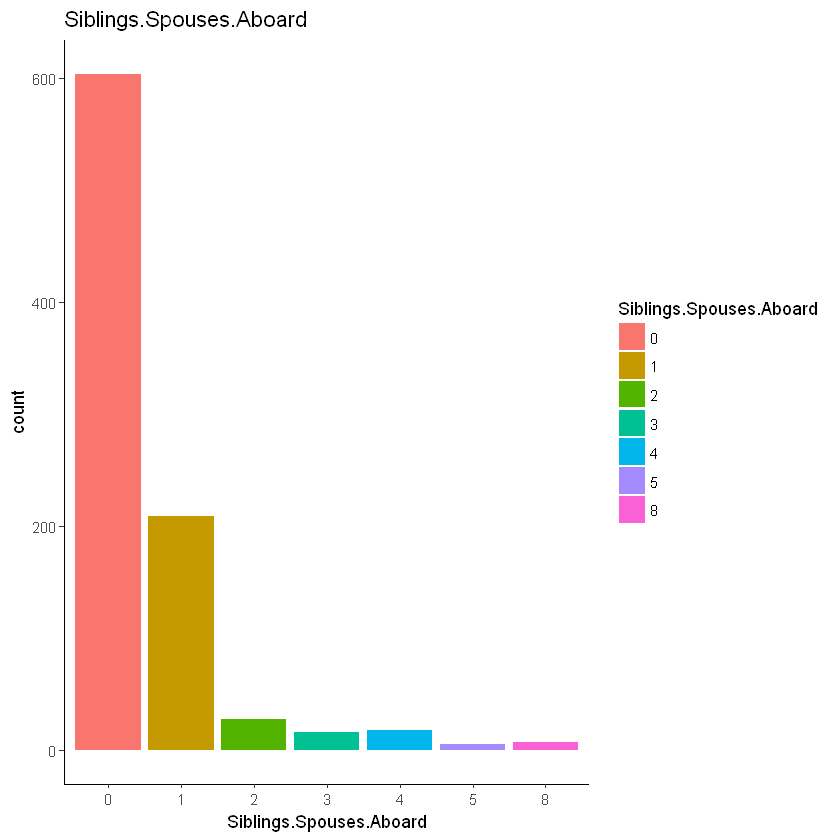

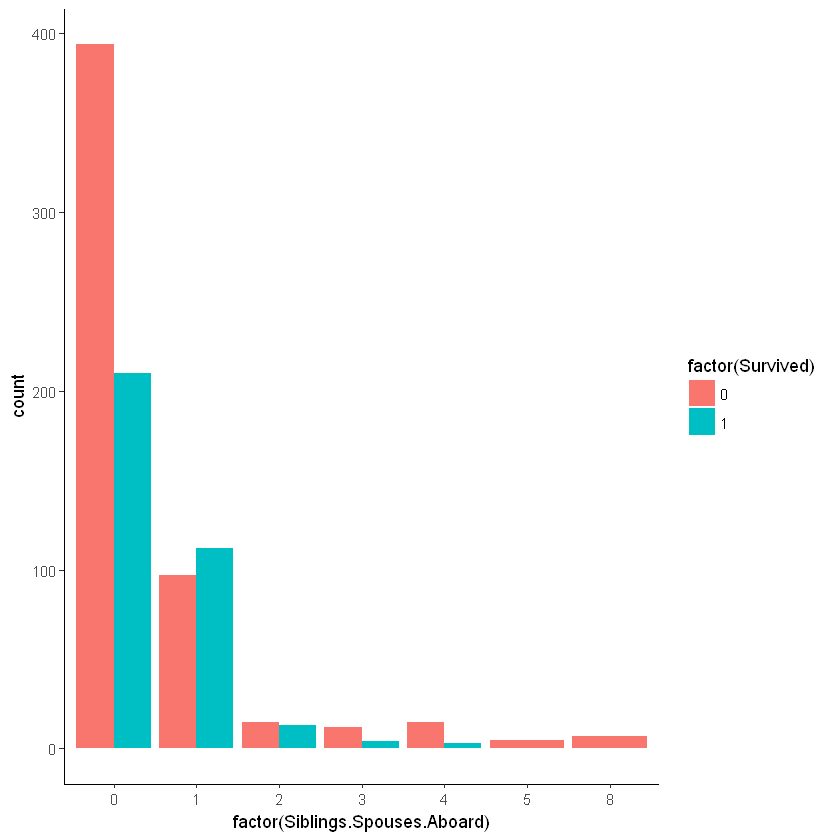

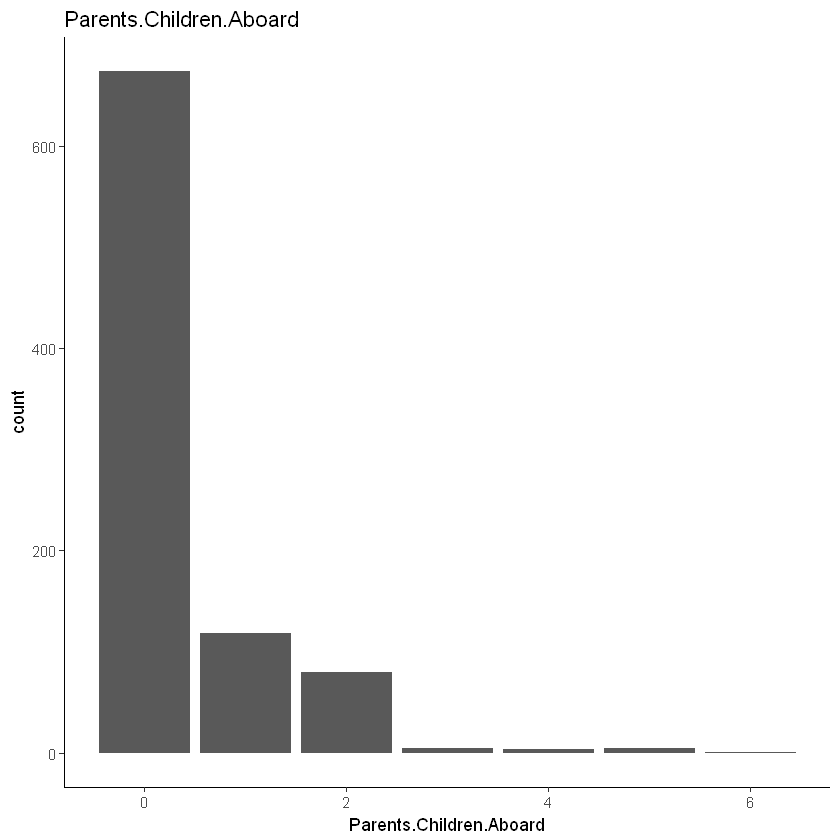

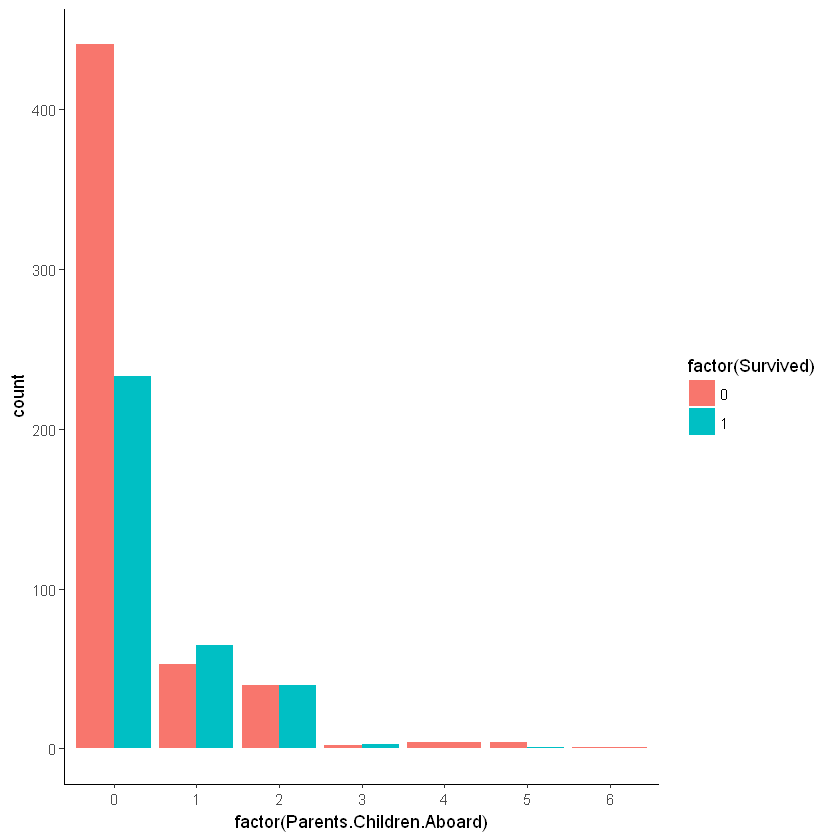

In [144]:
# 1. Survived
ggplot(data,aes(x=Survived, fill=Survived))+geom_bar(position="dodge")+
ggtitle("Survived")+labs(x="Survived",y="count")


# 2. Pclass
ggplot(data,aes(x=Pclass, fill = Pclass))+geom_bar(position="dodge")+
ggtitle("Pclass")+labs(x="Pclass",y="count")

ggplot(data,aes(x=factor(Pclass), fill=factor(Survived)))+ 
geom_bar(position="dodge") 

# 3. Sex
ggplot(data,aes(Sex, fill = Sex))+geom_bar(position="dodge")+
ggtitle("Sex")+labs(x="Sex",y="count")

ggplot(data,aes(x=factor(Sex), fill=factor(Survived)))+ 
geom_bar(position="dodge") 

# 4. Siblings.Spouses.Aboard
ggplot(data,aes(Siblings.Spouses.Aboard, fill = Siblings.Spouses.Aboard))+geom_bar(position="dodge")+
ggtitle("Siblings.Spouses.Aboard")+labs(x="Siblings.Spouses.Aboard",y="count")

ggplot(data,aes(x=factor(Siblings.Spouses.Aboard), fill=factor(Survived)))+ 
geom_bar(position="dodge") 

# 3. Parents.Children.Aboard
ggplot(data,aes(Parents.Children.Aboard, fill = Parents.Children.Aboard))+geom_bar(position="dodge")+
ggtitle("Parents.Children.Aboard")+labs(x="Parents.Children.Aboard",y="count")

ggplot(data,aes(x=factor(Parents.Children.Aboard), fill=factor(Survived)))+ 
geom_bar(position="dodge") 

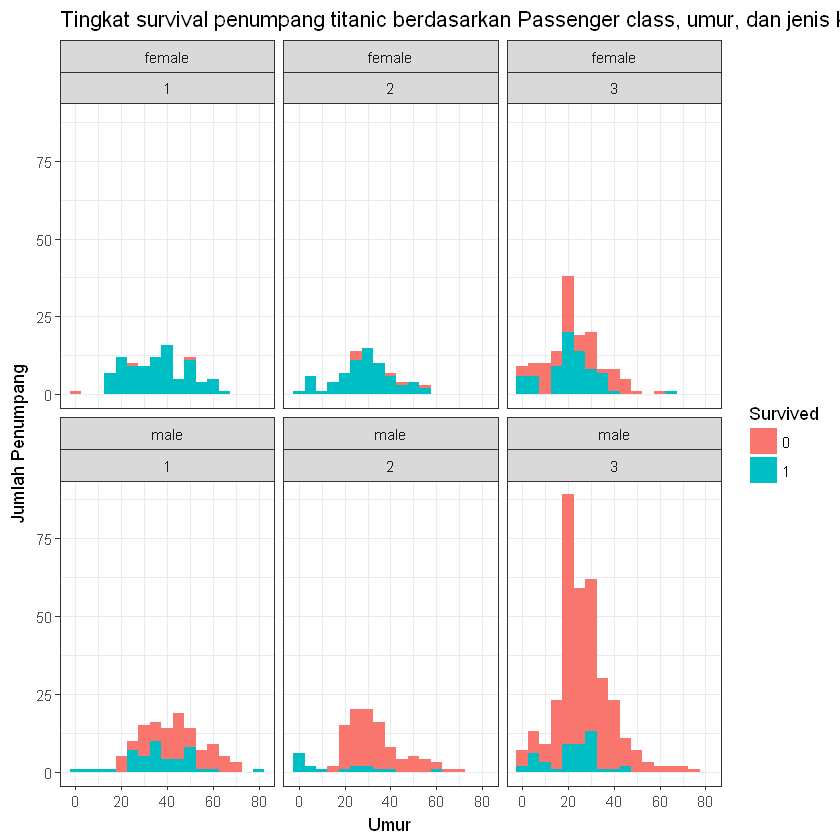

In [145]:
ggplot(data, aes(x = Age, fill = Survived)) +
theme_bw() +
facet_wrap(Sex ~ Pclass) +
geom_histogram(binwidth = 5) +
labs(y = "Jumlah Penumpang", x = "Umur", title = "Tingkat survival penumpang titanic berdasarkan Passenger class, umur, dan jenis kelamin")

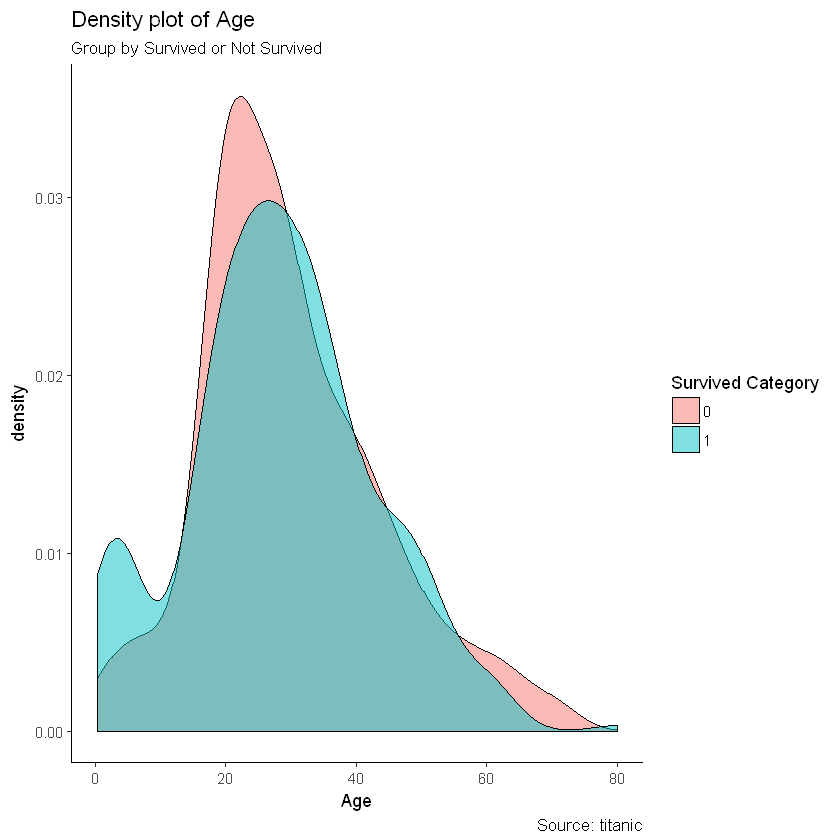

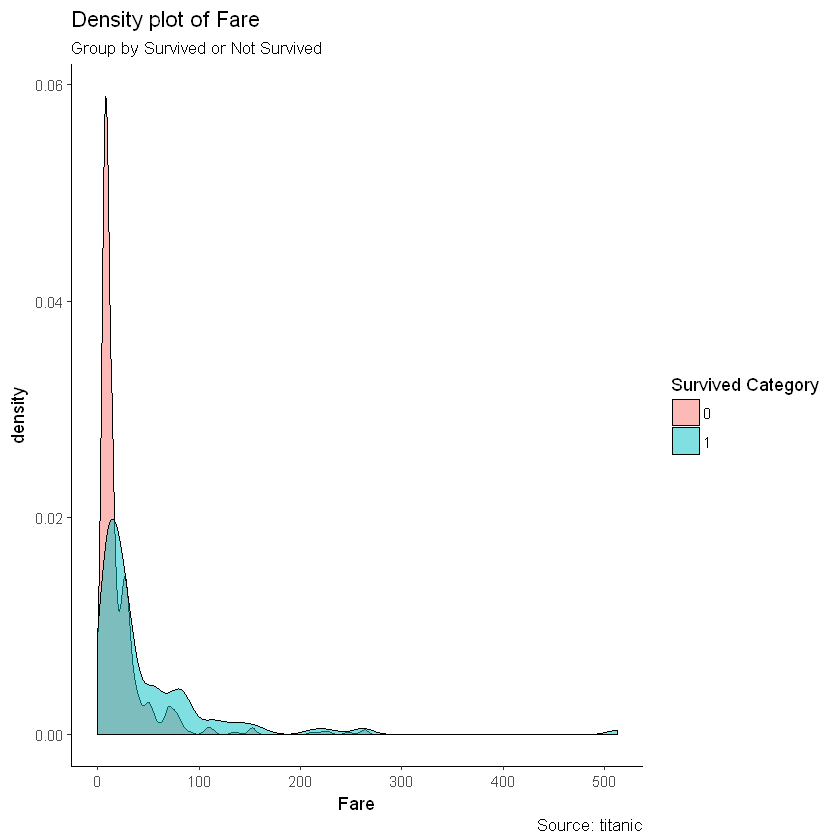

In [156]:
theme_set(theme_classic())
# 1. Age
g1 <- ggplot(data, aes(Age))
g1 + geom_density(aes(fill=factor(Survived)), alpha=0.5) + 
    labs(title="Density plot of Age", 
         subtitle="Group by Survived or Not Survived",
         caption="Source: titanic",
         x="Age",
         fill="Survived Category")

#2. Fare
g1 <- ggplot(data, aes(Fare))
g1 + geom_density(aes(fill=factor(Survived)), alpha=0.5) + 
    labs(title="Density plot of Fare", 
         subtitle="Group by Survived or Not Survived",
         caption="Source: titanic",
         x="Fare",
         fill="Survived Category")


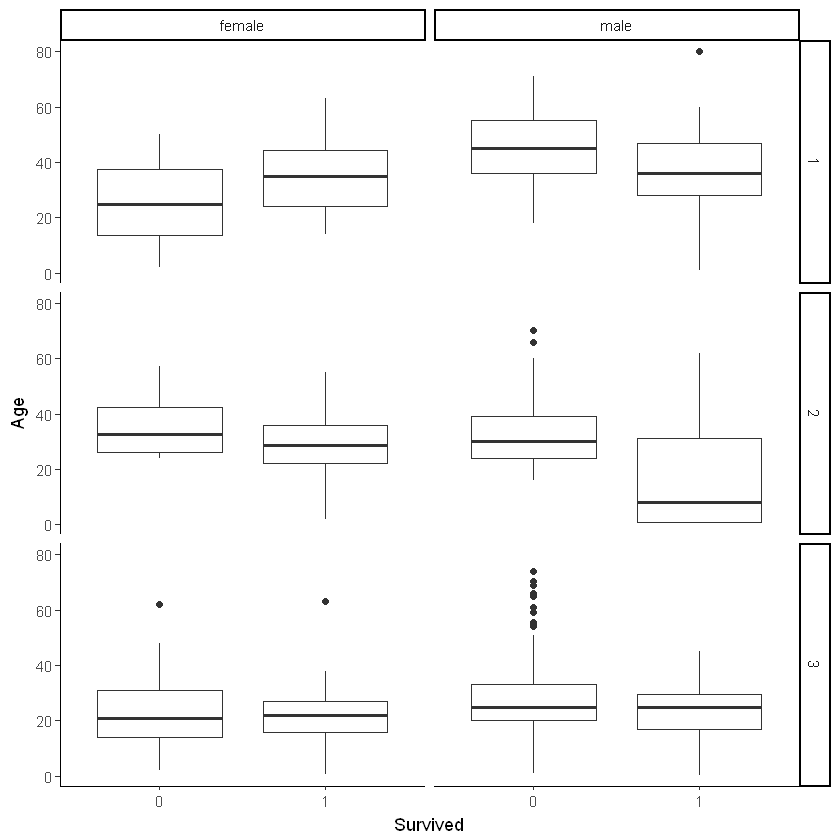

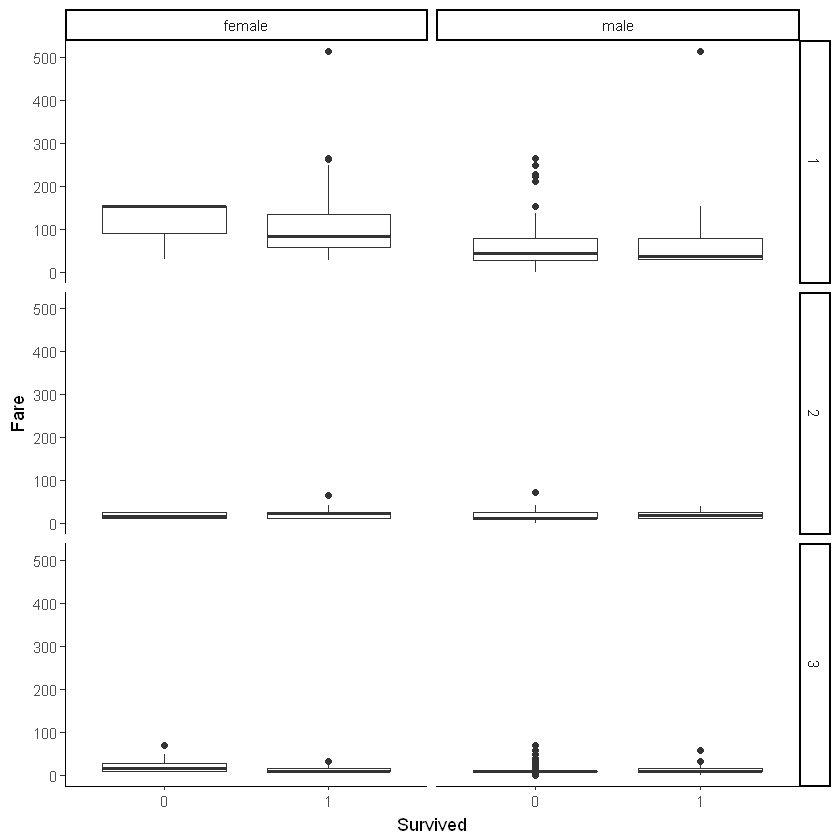

In [147]:
# Change box plot colors by groups
ggplot(data, aes(y=Age, x=Survived)) +
  geom_boxplot(position=position_dodge(1)) + facet_grid(Pclass~Sex)


# Change box plot colors by groups
ggplot(data, aes(y=Fare, x=Survived)) +
  geom_boxplot(position=position_dodge(1)) + facet_grid(Pclass~Sex)



In [149]:
summary(data)

 Survived Pclass                                  Name         Sex     
 0:545    1:216   Capt. Edward Gifford Crosby       :  1   female:314  
 1:342    2:184   Col. John Weir                    :  1   male  :573  
          3:487   Col. Oberst Alfons Simonius-Blumer:  1               
                  Don. Manuel E Uruchurtu           :  1               
                  Dr. Alfred Pain                   :  1               
                  Dr. Alice (Farnham) Leader        :  1               
                  (Other)                           :881               
      Age        Siblings.Spouses.Aboard Parents.Children.Aboard
 Min.   : 0.42   0:604                   Min.   :0.0000         
 1st Qu.:20.25   1:209                   1st Qu.:0.0000         
 Median :28.00   2: 28                   Median :0.0000         
 Mean   :29.47   3: 16                   Mean   :0.3833         
 3rd Qu.:38.00   4: 18                   3rd Qu.:0.0000         
 Max.   :80.00   5:  5            